## Generating exploratory data visualizations of trial 1 data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## change file path if needed
df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/oysterdrill/data/trial1data.csv')
df = df.drop('Trial',axis=1)
df = df.drop('Notes (dead day 2, etc)',axis=1)
df = df.drop('Rep', axis=1)
df['Location'] = df['Location'].str.strip()
df

,Oyster,Predation Date,Predated,Length (mm),Width (mm),Thickness,Location
0,1,NaN,0,58.0,41.0,5.477,Dock
1,2,10/22,1,81.0,34.0,3.153,Dock
2,3,10/22,1,90.0,44.0,4.320,Farm
3,4,10/23,1,67.0,25.0,4.017,Bridge
4,5,10/23,1,90.0,38.0,5.073,Dock
5,6,10/24,1,77.0,37.0,3.344,Farm
6,7,10/24,1,48.0,27.0,4.307,Dock
7,8,10/24,1,62.0,24.0,4.688,Dock
8,9,10/25,1,70.0,55.0,5.097,Farm
9,10,10/26,1,64.0,44.0,4.262,Dock


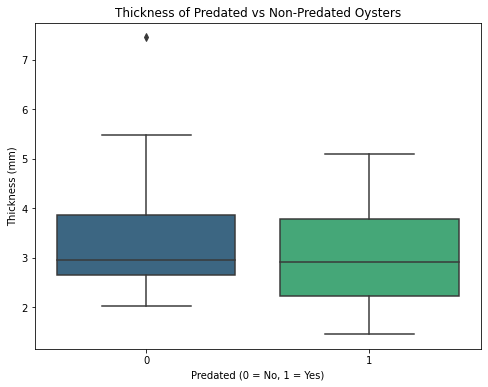

In [2]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x="Predated", y="Thickness", data=df, palette="viridis")
plt.title("Thickness of Predated vs Non-Predated Oysters")
plt.xlabel("Predated (0 = No, 1 = Yes)")
plt.ylabel("Thickness (mm)")
plt.show()


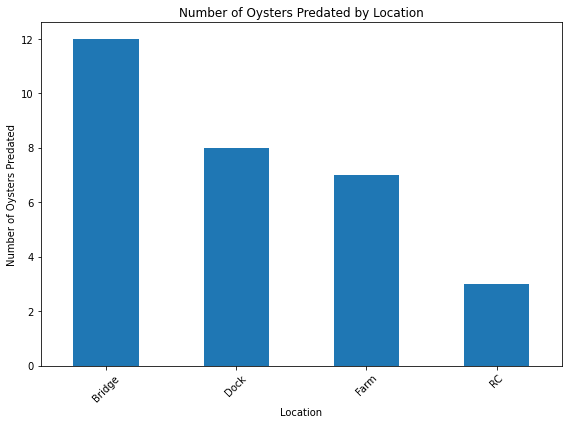

In [3]:
df
predated_df = df[df["Predated"] == 1]
counts = predated_df["Location"].value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind="bar")
plt.title("Number of Oysters Predated by Location")
plt.xlabel("Location")
plt.ylabel("Number of Oysters Predated")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway


counts_by_location = df.groupby(["Location", "Predated"])["Oyster"].count().unstack(fill_value=0)
counts_by_location

locations = df["Location"].unique()

# Group data by location for predated oysters
groups = [df[(df["Location"] == loc) & (df["Predated"] == 1)]["Length (mm)"] for loc in locations]

# Perform ANOVA
anova_stat, p_value = f_oneway(*groups)

# Display results
print(f"ANOVA Test: F-stat={anova_stat:.2f}, p-value={p_value:.4f}")

ANOVA Test: F-stat=2.89, p-value=0.0543


In [5]:

predated_df = df[df["Predated"] == 1]

predated_counts = predated_df["Location"].value_counts()

counts_df = pd.DataFrame(predated_counts).reset_index()
counts_df.columns = ["Location", "Count"]
counts_df


,Location,Count
0,Bridge,12
1,Dock,8
2,Farm,7
3,RC,3


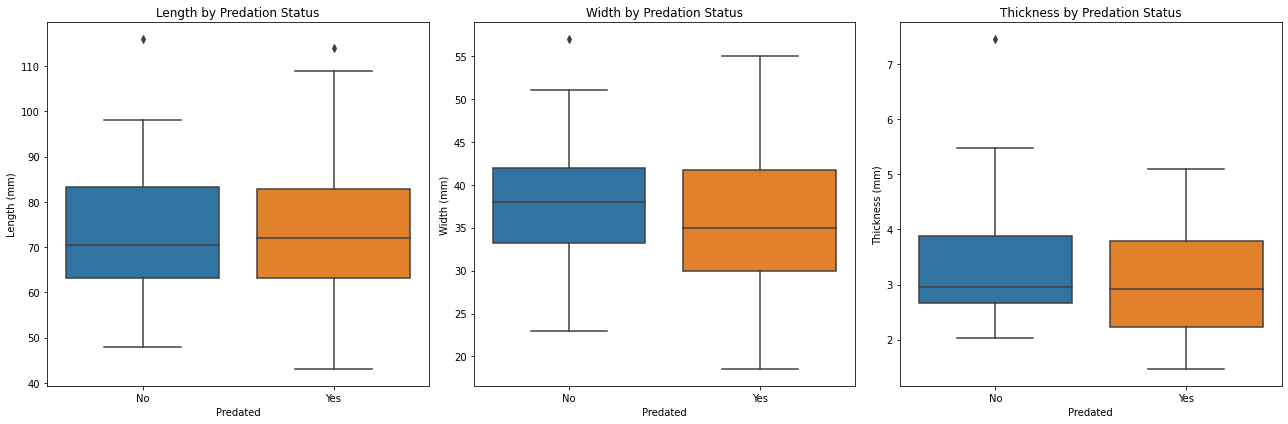

In [6]:

# Separate boxplots for length, width, and thickness
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Length boxplot
sns.boxplot(ax=axes[0], x="Predated", y="Length (mm)", data=df)
axes[0].set_title("Length by Predation Status")
axes[0].set_xlabel("Predated")
axes[0].set_ylabel("Length (mm)")
axes[0].set_xticklabels(["No", "Yes"])

# Width boxplot
sns.boxplot(ax=axes[1], x="Predated", y="Width (mm)", data=df)
axes[1].set_title("Width by Predation Status")
axes[1].set_xlabel("Predated")
axes[1].set_ylabel("Width (mm)")
axes[1].set_xticklabels(["No", "Yes"])

sns.boxplot(ax=axes[2], x="Predated", y="Thickness", data=df)
axes[2].set_title("Thickness by Predation Status")
axes[2].set_xlabel("Predated")
axes[2].set_ylabel("Thickness (mm)")
axes[2].set_xticklabels(["No", "Yes"])

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
#thickness t test 
from scipy.stats import ttest_ind
predated = df[df["Predated"] == 1]["Thickness"]
non_predated = df[df["Predated"] == 0]["Thickness"]
t_stat, p_value = ttest_ind(predated, non_predated, equal_var=False) 

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -1.2240
P-value: 0.2259


In [8]:
#length t tests
predated = df[df["Predated"] == 1]["Length (mm)"]
non_predated = df[df["Predated"] == 0]["Length (mm)"]
t_stat, p_value = ttest_ind(predated, non_predated, equal_var=False) 

print(f"Length T-statistic: {t_stat:.4f}")
print(f"Length P-value: {p_value:.4f}")

#width t tests
predated2 = df[df["Predated"] == 1]["Width (mm)"]
non_predated2 = df[df["Predated"] == 0]["Width (mm)"]
t_stat, p_value = ttest_ind(predated2, non_predated2, equal_var=False) 

print(f"Width T-statistic: {t_stat:.4f}")
print(f"Width P-value: {p_value:.4f}")



Length T-statistic: 0.3805
Length P-value: 0.7050
Width T-statistic: -1.1443
Width P-value: 0.2572


## PCA of trial 1 data

/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


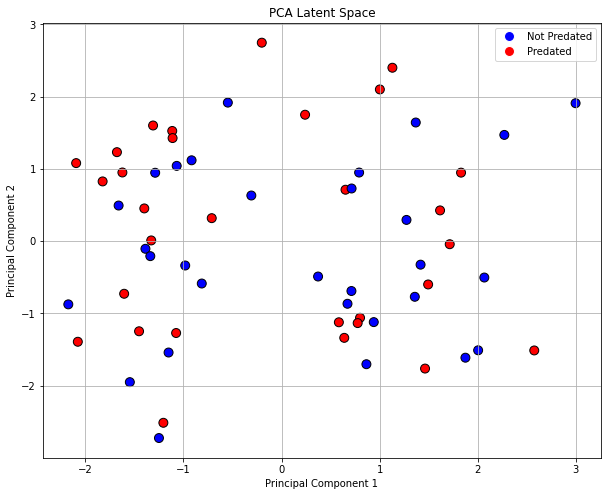

In [9]:
data = df
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

features = ["Length (mm)", "Width (mm)", "Thickness", "Location"]
X = data[features].dropna()
y = data["Predated"].dropna().loc[X.index]

encoder = OneHotEncoder(sparse=False)
location_encoded = encoder.fit_transform(X[["Location"]])
numerical_features = X[["Length (mm)", "Width (mm)", "Thickness"]].values
X_encoded = np.hstack([numerical_features, location_encoded])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

pca = PCA(n_components=2)
latent_space = pca.fit_transform(X_scaled)
latent_df = pd.DataFrame(latent_space, columns=["PC1", "PC2"])
latent_df["Predated"] = y.values
colors = latent_df["Predated"].map({0: "blue", 1: "red"})  
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_df["PC1"], latent_df["PC2"], 
                      c=colors, 
                      cmap="coolwarm", 
                      edgecolor="k", 
                      s=80)
# plt.colorbar(scatter, label="Predation Status")
plt.legend(handles=[
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="blue", markersize=10, label="Not Predated"),
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="red", markersize=10, label="Predated")
])

plt.title("PCA Latent Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

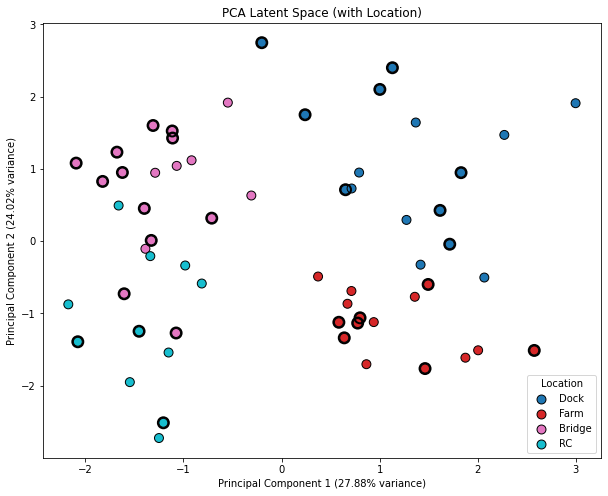

In [21]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 8))
# colors = latent_df["Predated"].map({0: "blue", 1: "red"})  # Map predation values to colors
from matplotlib import cm
import matplotlib.colors as mcolors
locations = data["Location"].unique()
cmap = cm.get_cmap("tab10", len(locations))  # Choose a colormap
location_colors = {loc: cmap(i) for i, loc in enumerate(locations)}
colors = data["Location"].map(location_colors)


plt.scatter(latent_df["PC1"], latent_df["PC2"], 
            c=colors, 
            edgecolor="k", 
            s=80)
plt.title("PCA Latent Space (with Location)")
plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}% variance)")

predated = latent_df["Predated"] == 1  # Boolean mask for predated points
plt.scatter(latent_df.loc[predated, "PC1"], latent_df.loc[predated, "PC2"], 
            facecolors="none", 
            edgecolors="black", 
            s=120, 
            linewidth=2, 
            #label="Predated"
            )
for loc, color in location_colors.items():
    plt.scatter([], [], c=[color], label=loc, s=80, edgecolor="k")
plt.legend(title="Location", loc="lower right", fontsize=10)
plt.grid(False)

# features_with_location = ["Length (mm)", "Width (mm)", "Thickness"] + encoder.get_feature_names_out(["Location"]).tolist()
# for i, feature in enumerate(features_with_location):
#     arrow_x, arrow_y = pca.components_[0, i], pca.components_[1, i]
#     plt.arrow(0, 0, arrow_x, arrow_y, color="black", alpha=0.8, head_width=0.03, head_length=0.05)
#     plt.text(arrow_x * 1.1, arrow_y * 1.1, feature, color="black", ha="center", fontsize=9)

plt.show()



## Random Forest of trial 1 data

/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


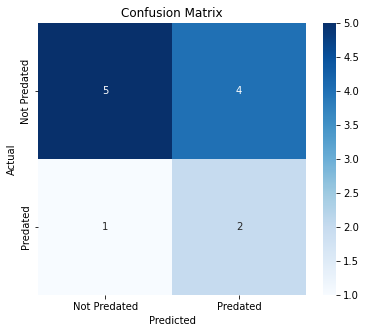

Accuracy: 0.5833
Precision: 0.3333
Recall: 0.6667


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ["Length (mm)", "Width (mm)", "Thickness", "Location"]
X = data[features].dropna()
y = data["Predated"].dropna().loc[X.index]
encoder = OneHotEncoder(sparse=False)
location_encoded = encoder.fit_transform(X[["Location"]])
numerical_features = X[["Length (mm)", "Width (mm)", "Thickness"]].values
X_encoded = np.hstack([numerical_features, location_encoded])
scaler = StandardScaler()
X_encoded[:, :3] = scaler.fit_transform(X_encoded[:, :3])
# encoder.get_feature_names_out(["Location"]).tolist()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Predated", "Predated"], yticklabels=["Not Predated", "Predated"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


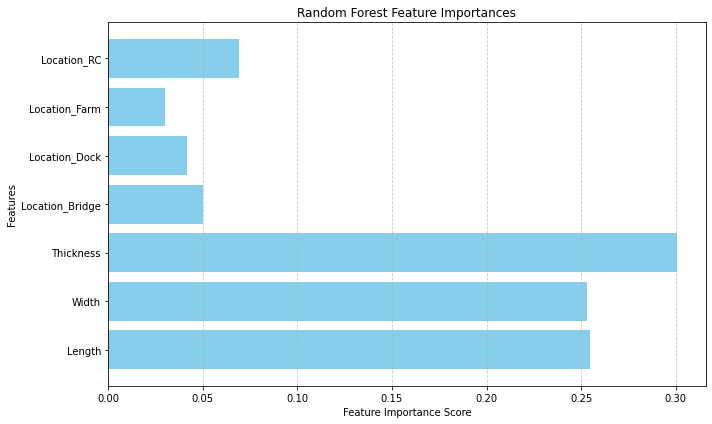

In [12]:
# Feature importance
importances = clf.feature_importances_
feature_names = ["Length", "Width", "Thickness"] + encoder.get_feature_names_out(["Location"]).tolist()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
## determine how correlated features are
## hypertuning for model?